<a href="https://colab.research.google.com/github/Ha-minss/Classes-in-University/blob/main/Term2%20-%20ML%20-%20Week2%20-%20Logistic%20regression%2C%20SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from sklearn.datasets     import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm          import SVC
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [18]:
iris = load_iris()

In [19]:
x = iris.data[iris.target != 2, :2]   # 0(setosa), 1(versicolor)
y = iris.target[iris.target != 2]
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42
)

In [22]:
# 1) 로지스틱 회귀
lr = LogisticRegression().fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
proba_lr    = lr.predict_proba(x_test)[:,1]

In [24]:
# 2) SVM (linear)
svm_linear = SVC(kernel='linear', C=1.0, probability=True).fit(x_train, y_train)
y_pred_svm  = svm_linear.predict(x_test)
proba_svm   = svm_linear.predict_proba(x_test)[:,1]

로지스틱 회귀 Accuracy: 1.000, AUC: 1.000
SVM(선형)        Accuracy: 1.000, AUC: 1.000


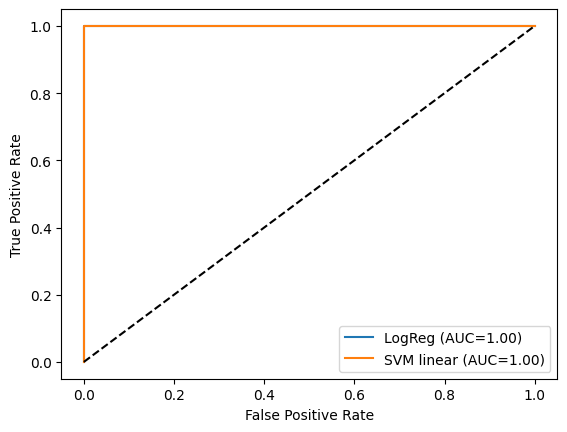

In [27]:
# 정확도
acc_lr  = accuracy_score(y_test, y_pred_lr)
acc_svm = accuracy_score(y_test, y_pred_svm)

# ROC & AUC
fpr_lr, tpr_lr, _  = roc_curve(y_test, proba_lr)
fpr_svm, tpr_svm, _= roc_curve(y_test, proba_svm)
auc_lr  = roc_auc_score(y_test, proba_lr)
auc_svm = roc_auc_score(y_test, proba_svm)

# 출력
print(f"로지스틱 회귀 Accuracy: {acc_lr:.3f}, AUC: {auc_lr:.3f}")
print(f"SVM(선형)        Accuracy: {acc_svm:.3f}, AUC: {auc_svm:.3f}")

# ROC 곡선 그리기
plt.plot(fpr_lr,  tpr_lr,  label=f"LogReg (AUC={auc_lr:.2f})")
plt.plot(fpr_svm, tpr_svm, label=f"SVM linear (AUC={auc_svm:.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()
